In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [269]:
dataset = pd.read_csv('dataset_malwares.csv')

In [270]:

from sklearn.model_selection import train_test_split

In [271]:
dataset.keys()

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [272]:
X = dataset.drop(['Name','Malware'], axis=1)
y = dataset['Malware']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
11441,23117,144,3,0,4,0,65535,0,184,0,...,3791650912,0,17,22,0,409626,422944,81920,77824,0
2624,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,135,0,0,113332,131072,0,0
18874,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,15,347,4,111632,132520,139264,0,0
16415,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,7,159,0,0,29736,241664,0,117181216
11179,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,88,0,0,222988,241664,0,719360


In [273]:
dataset.drop(['Name','Malware'], axis=1).values

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [274]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [275]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()


,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,1.076024,0.0,1.379922,-0.623512,-0.087645,0.000436,-0.000677,-0.067061,-0.019125,-0.040622
1,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.656755,0.249356,-0.087645,-0.016366,-0.059942,-0.060538,-0.020494,-0.040622
2,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,1.125337,1.886949,-0.063126,-0.011787,-0.056269,-0.059451,-0.020494,-0.040622
3,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,0.106999,0.434744,-0.087645,-0.016366,-0.075943,-0.045862,-0.020494,5.561297
4,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.274878,-0.113695,-0.087645,-0.016366,-0.038952,-0.045862,-0.020494,-0.006233


In [276]:
import seaborn as sns

corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(80,80))
#plot heat map
plt.savefig('heatmap.png')
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [306]:
cor = dataset.corr()
cor_target = abs(cor["Malware"])
relevant_features = cor_target[cor_target>0.1]
print(relevant_features.drop('Malware').keys())

Index(['e_maxalloc', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorSubsystemVersion',
       'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SuspiciousImportFunctions', 'SectionsLength', 'SectionMaxChar',
       'DirectoryEntryImport', 'DirectoryEntryExport'],
      dtype='object')


In [277]:
X.shape

(19611, 77)

e:\Users\rahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00000000e+00 5.59149353e-04 1.59562617e-03 3.51837348e-05
 1.60783802e-04 7.66469976e-04 1.19978955e-02 6.20907711e-05
 5.55369252e-04 1.37010121e-04 4.59112327e-05 2.48094773e-04
 3.53143459e-05 8.85129927e-04 3.08220960e-04 3.33603285e-04
 3.70150717e-03 1.18577542e-02 5.62616266e-03 3.98011662e-02
 2.28472342e-04 1.04062579e-03 1.54216641e-02 1.50927718e-01
 2.65165049e-02 1.84325869e-02 3.68968432e-03 4.90363636e-03
 5.11160567e-03 5.80873151e-04 3.65282965e-03 2.92691641e-03
 2.87108354e-02 1.69650419e-02 1.44705527e-02 7.89924948e-02
 6.14562360e-02 8.90157885e-03 6.72807568e-03 3.27621516e-02
 3.50586200e-02 9.32842300e-03 1.06160193e-02 4.01479675e-03
 1.02699074e-01 3.23503523e-02 5.99384189e-02 1.28426568e-03
 8.84265878e-03 3.81308952e-03 7.94621487e-05 7.62247970e-05
 5.02659405e-03 1.43961281e-03 7.92328710e-03 1.95740561e-02
 0.00000000e+00 4.21449653e-03 0.00000000e+00 4.42347863e-03
 0.00000000e+00 3.23253688e-03 0.00000000e+00 3.06286971e-03
 0.00000000e+00 7.503657

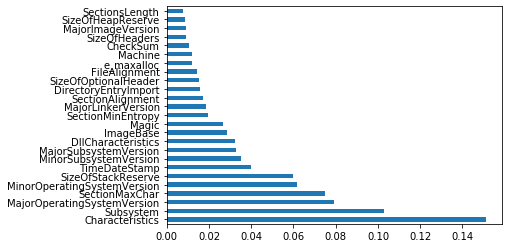

In [299]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_new,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dataset.drop(['Name','Malware'], axis=1).columns)
feat_importances.nlargest(25).plot(kind='barh')
print((feat_importances.head()))
plt.show()

In [279]:
from sklearn.ensemble import RandomForestClassifier as RFC

# X2 = X_new[['e_maxalloc','SectionAlignment','FileAlignment','SuspiciousImportFunctions','MinorOperatingSystemVersion','SectionMinEntropy','MinorSubsystemVersion','Subsystem','DllCharacteristics','MajorSubsystemVersion','ImageBase','Characteristics']]

In [307]:
def filterdf(df):
    X2 = df[['e_maxalloc', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorSubsystemVersion',
       'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SuspiciousImportFunctions', 'SectionsLength', 'SectionMaxChar',
       'DirectoryEntryImport', 'DirectoryEntryExport']]
    return X2

In [308]:
model = RFC(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16, 
                         max_features = 'sqrt')
model.fit(filterdf(X_new), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [309]:

print(np.shape(filterdf(X_new)))
print(np.shape(filterdf(X_test)))

(15688, 22)
(3923, 22)


In [310]:
model.score(filterdf(X_new),y_train)

0.9969403365629781

In [311]:
X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X_new.columns)
model.score(filterdf(X_test_new),y_test)

0.9936273260260005

In [312]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(filterdf(X_test_new))
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       1.00      0.99      1.00      2958

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923



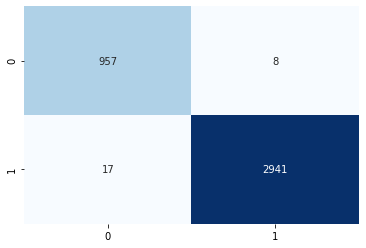

In [313]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)


In [314]:
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scale', scaler), ('clf', model)])


In [315]:
test = pd.read_csv('dataset_test.csv', sep=',')

X_to_push = test
X_testing = test.drop(['Name'], axis=1)


clf = pipe
X_testing_scaled = clf.named_steps['scale'].transform(X_testing)
# X_testing_pca = clf.named_steps['pca'].transform(X_testing_scaled)
# print(type(X_testing_scaled))
X_testing_new = pd.DataFrame(X_testing_scaled, columns=X_testing.columns)

y_testing_pred = clf.named_steps['clf'].predict(filterdf(X_testing_new))
pd.concat([X_to_push['Name'], pd.DataFrame(y_testing_pred) ], axis=1)


,Name,0
0,Skype-8.10.0.9.exe,0
1,vlc-3.0.2-win64.exe,0
2,stinger32.exe,0
3,SpotifyFullSetup.exe,0
4,uftp_english.exe,0
5,161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...,1
6,eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...,0
7,reverse_shell.exe,1
8,873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...,0
9,ScratchInstaller1.4.exe,1
